In [1]:
import pandas as pd
import bt
import matplotlib.pyplot as plt

from mauspad_score import *
%matplotlib inline

In [2]:
symbols = ['TSLA', 'AMKR', 'GOOG', 'MDU', 'LNTH', 'MANH']
thresholds = {"ev_mc": 2,
                "netto_debt": 2,
                "ev_ebit": 20,
                "net_profit_margin": 10,
                "roe": 15}

scores = pd.DataFrame()
prices = pd.DataFrame()
for symbol in symbols:   
    m_score = Mauspad_score(symbol, "2018-01-01", "2022-12-31")
    score = m_score.get_score(thresholds)
    price = m_score.prices["Close"]

    scores = scores.join(score)
    prices = prices.join(price)

scores.columns, prices.columns = symbols, symbols
print(scores.head(1), prices.head(1))

Starting with TSLA


KeyError: 0

Stat                 above3      long
-------------------  ----------  ----------
Start                2018-03-30  2018-03-30
End                  2022-12-31  2022-12-31
Risk-free rate       0.00%       0.00%

Total Return         236.44%     203.51%
Daily Sharpe         6.87        5.66
Daily Sortino        16.70       12.65
CAGR                 29.06%      26.30%
Max Drawdown         -25.28%     -44.54%
Calmar Ratio         1.15        0.59

MTD                  -           -
3m                   8.06%       -32.72%
6m                   10.22%      -25.04%
YTD                  -17.63%     -42.61%
1Y                   -17.63%     -42.61%
3Y (ann.)            20.74%      29.42%
5Y (ann.)            29.06%      26.30%
10Y (ann.)           -           -
Since Incep. (ann.)  29.06%      26.30%

Daily Sharpe         6.87        5.66
Daily Sortino        16.70       12.65
Daily Mean (ann.)    1907.93%    1976.72%
Daily Vol (ann.)     277.79%     349.36%
Daily Skew           0.71        0.43

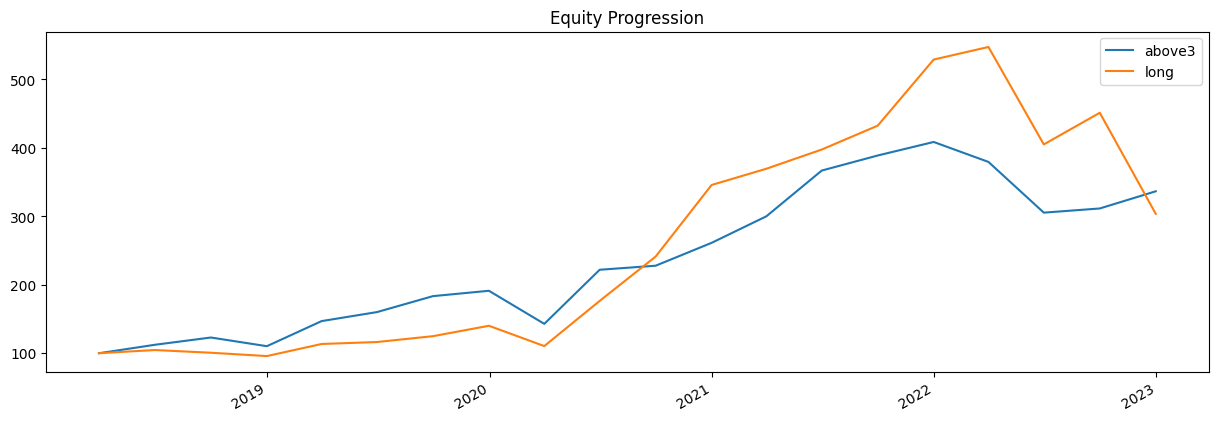

In [ ]:
def above_3():
    # first we create the Strategy
    s = bt.Strategy('above3', [
                                bt.algos.RunQuarterly(run_on_end_of_period=True),
                                bt.algos.SelectWhere(scores >= 3),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()])

    # now we create the Backtest
    return bt.Backtest(s, prices)

def long_only_ew():
    s = bt.Strategy('long', [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, prices)
    
# and let's run it!
res = bt.run(above_3(), long_only_ew())
res.plot()
res.display()